In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [0]:
X = pd.read_csv("X.csv")
y = X['NUM_GRAVEDAD']
X = X.drop('NUM_GRAVEDAD', axis=1)

In [0]:
from sklearn.linear_model import Lasso

model = Lasso()

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y)

In [17]:
X_train

,X,Y,OBJECTID,RADICADO,DIA,PERIODO,CBML,DIA_SEMANA,MES,NUM_COMUNA,NUM_DISENO,NUM_CLASE
29132,-75.578564,6.214637,726860.0,1657694.0,24.0,2019.0,1507.0,4.0,1.0,15.0,1.0,1.0
15005,-75.582709,6.291900,667597.0,1637218.0,5.0,2018.0,606.0,7.0,8.0,6.0,2.0,2.0
8208,-75.547438,6.292525,662731.0,1632106.0,23.0,2018.0,104.0,6.0,6.0,1.0,2.0,2.0
1158,-75.592539,6.219581,562069.0,1618186.0,23.0,2018.0,1506.0,5.0,2.0,15.0,1.0,1.0
20630,-75.585066,6.260510,723437.0,1669118.0,2.0,2019.0,1115.0,4.0,5.0,11.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4798,-75.613759,6.245198,684886.0,1653383.0,14.0,2018.0,1209.0,5.0,12.0,12.0,1.0,1.0
24619,-75.565593,6.231106,718183.0,1658654.0,2.0,2019.0,914.0,6.0,2.0,9.0,1.0,1.0
32919,-75.552563,6.234050,711546.0,1662258.0,3.0,2019.0,910.0,7.0,3.0,9.0,3.0,2.0
7497,-75.600276,6.237717,562678.0,1624318.0,20.0,2018.0,1109.0,5.0,4.0,11.0,1.0,4.0


In [18]:
len(X_train)/len(X)

0.75

por defecto nos asigna 75% de train
25% test

In [19]:
model.fit(X_train,y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [20]:
model.score(X_test,y_test)

-0.0005760509132377578

In [21]:
model.coef_

array([-0.00000000e+00, -0.00000000e+00,  5.63117044e-08, -1.16166897e-07,
       -0.00000000e+00, -0.00000000e+00, -4.77072395e-11, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00])

In [26]:
var = np.floor(np.log10(np.abs(model.coef_)))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


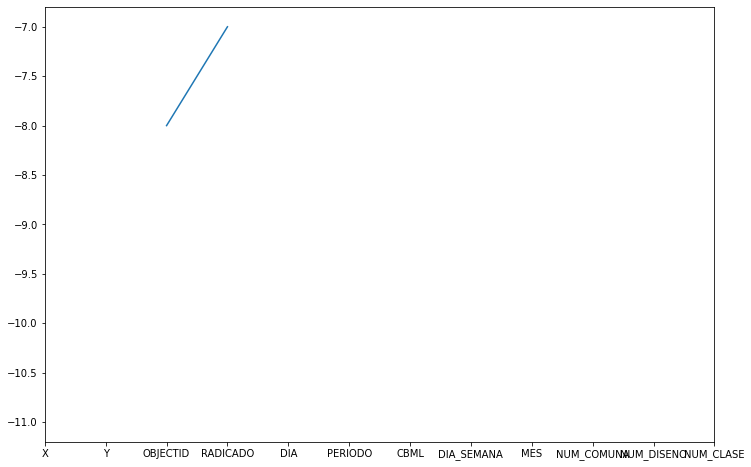

In [35]:
plt.rcParams['figure.figsize'] = [12,8]
plt.plot(var)
plt.xticks(np.arange(12), list (X.columns));

Correlación entre variables

In [0]:
import seaborn as sns


In [0]:
clase = pd.cut(X['NUM_CLASE'],3).cat.codes.rename('class')
z2 = pd.concat([X,clase],axis=1)

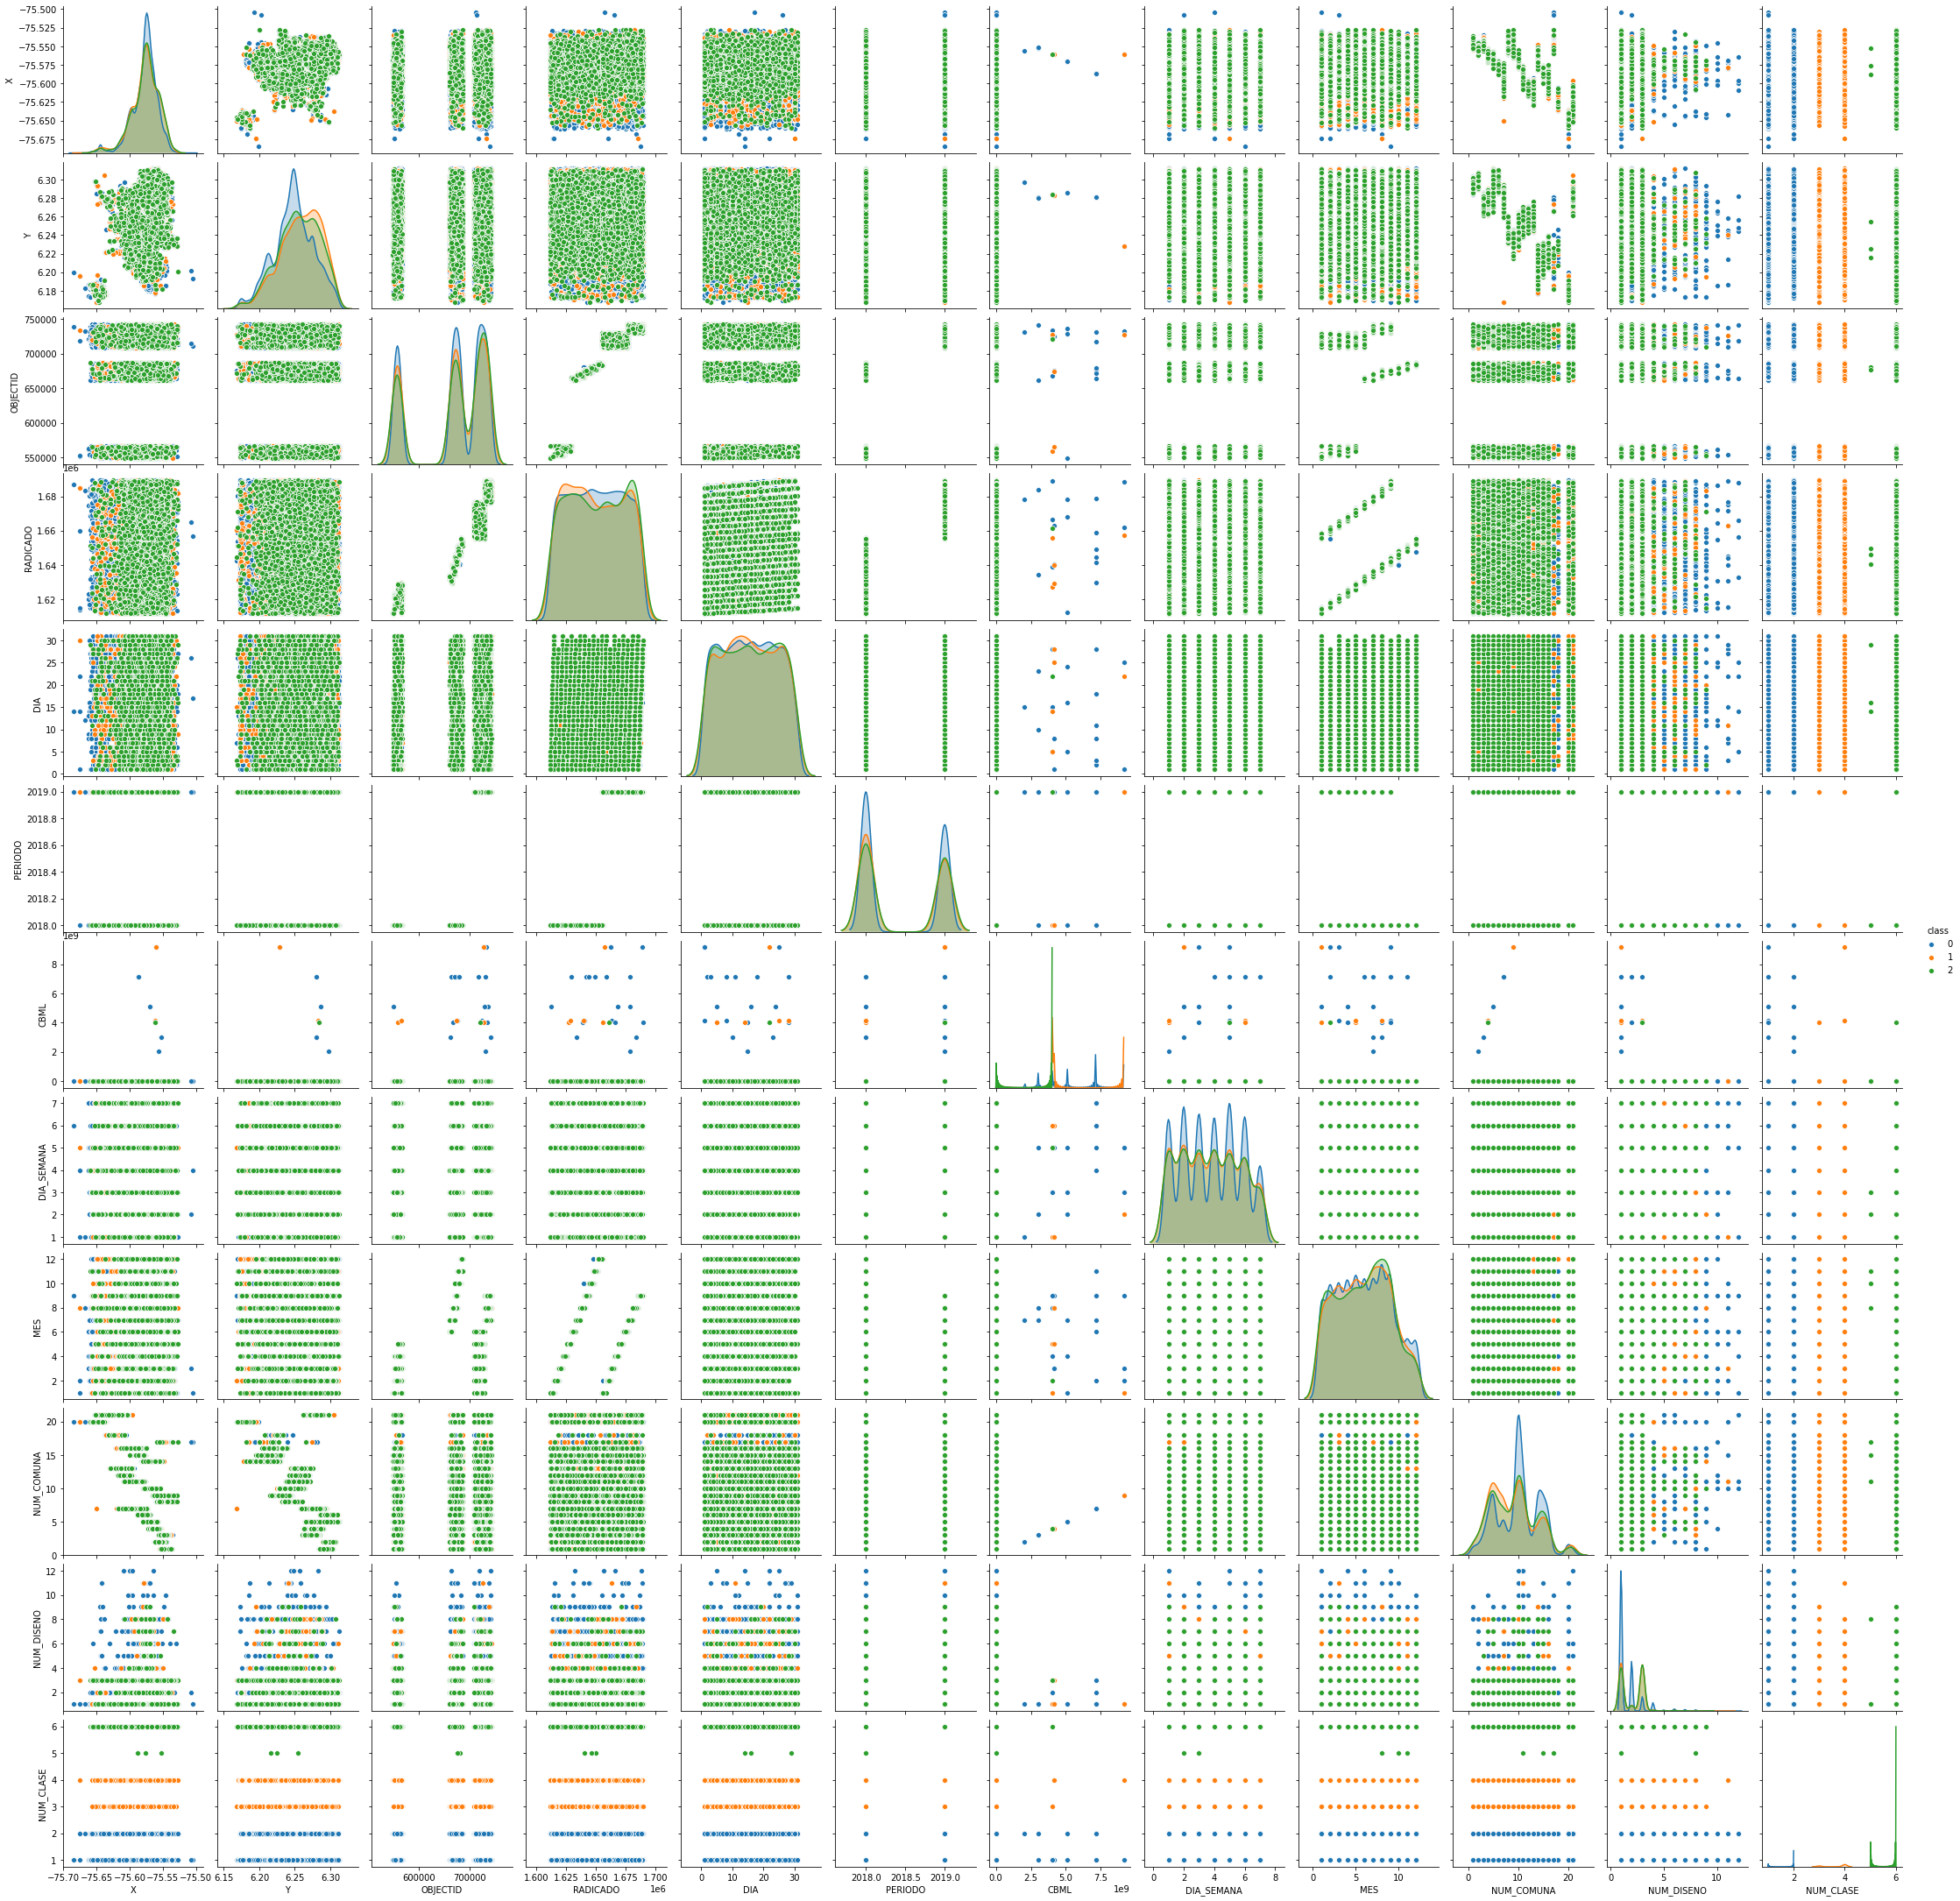

In [55]:
sns.pairplot(z2,hue='class')

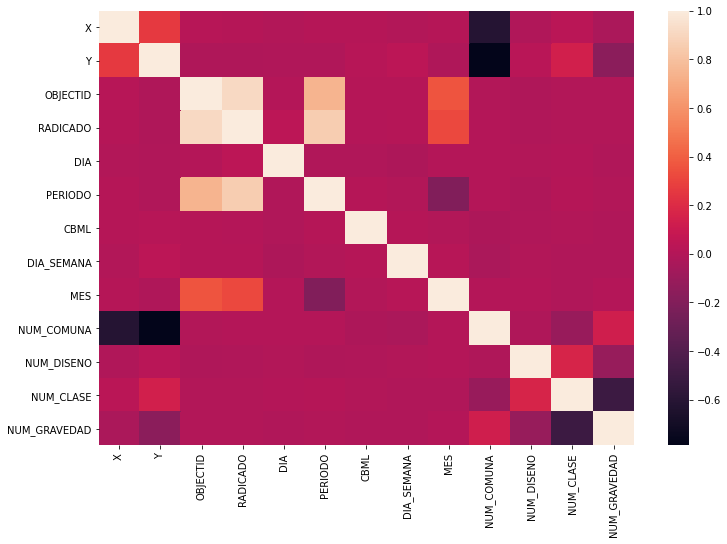

In [57]:
z3 = pd.concat([X,y], axis=1)
sns.heatmap(z3.corr())

**Metodos de selección automatica de feature**

Sklearn posse metodos para seleccionar las mejores feaures

In [62]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

selector = SelectKBest(mutual_info_regression, k=4)
selector.fit(X,y)

SelectKBest(k=4, score_func=<function mutual_info_regression at 0x7f9278c642f0>)

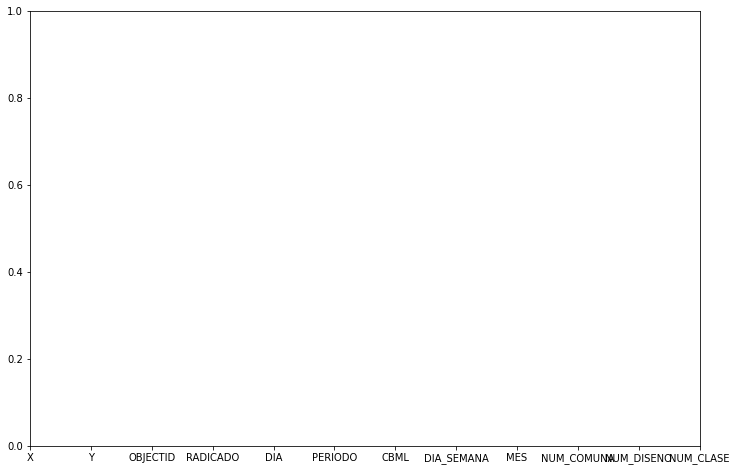

In [67]:
scores = selector.scores_
plt.rcParams["figure.figsize"] = [12,8]
plt.xticks(np.arange(12),list(X.columns));

**Guardaremos las 7 features entregadas por la interpretación de nuestra regresion Lasso**

In [0]:
X2 = X[['X','Y', 'OBJECTID', 'RADICADO',	'NUM_DISENO',	'NUM_CLASE','DIA',	'PERIODO',	'CBML',	'DIA_SEMANA',	'MES']]
X3 = X[['OBJECTID', 'RADICADO',	'NUM_DISENO',	'NUM_CLASE','DIA','DIA_SEMANA',	'MES']]


In [0]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [0]:
cols2 = ['X','Y', 'DIA',	'PERIODO',	'CBML',	'DIA_SEMANA',	'MES']
x2_train , x2_test, y2_train, y2_test = x_train[cols2], x_test[cols2], y_train, y_test

cols3 = ['OBJECTID', 'RADICADO',	'NUM_DISENO',	'NUM_CLASE']
x3_train , x3_test, y3_train, y3_test = x_train[cols3], x_test[cols3], y_train, y_test

In [93]:
from sklearn.linear_model import Lasso

model1 = Lasso()
model2 = Lasso()
model3 = Lasso()

model1.fit(x_test,y_test)
model2.fit(x2_test,y2_test)
model3.fit(x3_test,y3_test)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [94]:
print(model1.score(x_test,y_test))
print(model2.score(x2_test,y2_test))
print(model3.score(x3_test,y3_test))

0.0003065247820019934
0.00011841744562435251
0.0001917376694481332


No nos fue util reducir la dimención por lo tanto debemos probar mas modelos